# Introduction to Data Science

Before you hand this problem in, make sure everything runs as expected. You should **restart the kernel and run all cells** by selecting 

`Kernel --> Restart Kernel and Run All Cells`

in the menubar.

- Of course, you should use **an appropriate kernel** on the Jupyterhub of the math department or locally, so that the right modules are used and the calculations can be checked deterministically.  
- Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".
- Rename this problem sheet as follows:

      ps{number of lab}_{your user name}_problem{number of problem sheet in this lab}
    
  for example
    
      ps02_blja_problem1
    
- Please fill out the cell below for **every submission**.

**Change in submission of files**: Please upload this submission until next Tuesday to your shared Nextcloud [https://tuc.cloud/](https://tuc.cloud/) directory with the name of your username which has been created during the third exercise lab.
If you have not yet been assigned to a shared Nextcloud folder, please contact me via email (jan.blechschmidt@mathematik.tu-chemnitz.de) as soon as possible.

In [ ]:
NAME = "Tanay Maurya"
EMAIL = "tanay.maurya@s2024.tu-chemnitz.de"
USERNAME = "tanay@tu-chemnitz.de"

---

# Introduction to Data Science
## Lab 8: Linear discriminant analysis (LDA) and Logistic Regression for the classification of iris types

The flower petal data set consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal size.

Given the predictors
- 1st column: sepal length,
- 2nd column: sepal width,
- 3rd column: petal length and
- 4th column: petal width,

our goal is to predict the correct class (0-Setosa, 1-Versicolour or 2-Virginica).

The data set is part of `scikit-learn`'s datasets module and can be imported with the following commands:

In [1]:
from sklearn import datasets
iris = datasets.load_iris()

The data comes as a dictionary.
A *dictionary* is an unordered collection of items.
While other compound data types have only `values` as elements (a *list* for example), a dictionary consists of `key: value` pairs.
You can access the predictors using `iris.data` and the classes using `iris.target`, or equivalently by `iris['data']` and `iris['target']`.

**Task (1 point)**: Store the predictors in a variable `X` and the response in a variable `y`.

In [7]:
# YOUR CODE HERE
X = iris['data']
y = iris['target']

In [8]:
assert 'X' in locals()
assert 'y' in locals()

**Task (2 points)**: Plot the sepal length on the x-axis and the sepal width on the y-axis. Color each of the three types of irises differently.
Add a legend that gives the correct iris type (0-Setosa, 1-Versicolour, 2-Virginica)

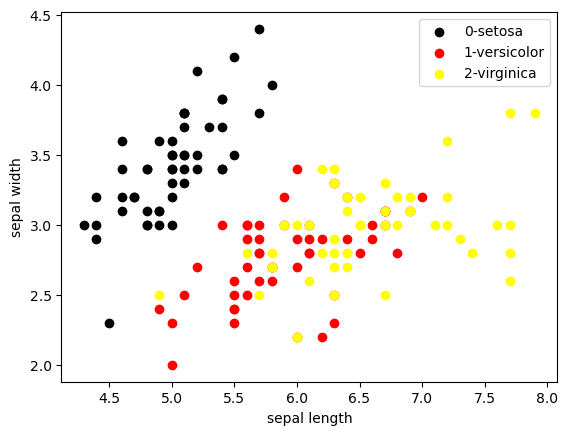

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
# YOUR CODE HERE
target_names = iris['target_names']
colors = ['black','red','yellow']
for i, color in enumerate(colors):
    plt.scatter(X[:,0][y == i], X[:,1][y == i], 
                color=color, label=f"{i}-{target_names[i]}")
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend();

**Task (2 points)**:
Split your data into a training and a test set.
Put the first 40 samples within each class in the training set and the remaining samples in a test data set.

Store the training set in variables `Xtrain` and `ytrain`, and the test set in variables `Xtest` and `ytest`, resp.

In [63]:
import numpy as np
# YOUR CODE HERE
train_indices = np.hstack([np.where(y == i)[0][:40] for i in np.unique(y)])
test_indices = np.hstack([np.where(y == i)[0][40:] for i in np.unique(y)])
Xtrain, ytrain = X[train_indices], y[train_indices]
Xtest, ytest = X[test_indices], y[test_indices]

In [64]:
assert 'Xtrain' in locals()
assert 'ytrain' in locals()
assert 'Xtest' in locals()
assert 'ytest' in locals()

### Part B: Linear discriminant analysis

In the lecture you've heard about the classification method called
*Linear discriminant analysis (LDA)*.

**Task (1 point)**: Find a way using `scikit-learn` to accomplish a linear discriminant analysis on the **training data set**.

Perform an LDA using only the first two predictors, i.e., `sepal length` and `sepal width`.
Store your trained model in the variable `lda`.

In [65]:
# YOUR CODE HERE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(Xtrain[:,:2],ytrain)

LinearDiscriminantAnalysis()

In [66]:
assert 'lda' in locals()

**Task (1 point)**: What is the proportion of correctly classified irises in the **test data set**? Store your answer in the variable `prop1`.

In [67]:
# YOUR CODE HERE
prop1 = lda.score(Xtrain[:,:2],ytrain)

In [68]:
assert 'prop1' in locals()

**Task (2 points)**: Now, incorporate all of the predictors and perform a second linear discriminant analysis using **only the training data**.
How does the proportion of correct classifications change (for the **test data**)?
Store the proportion of correct classifications for the test set in the variable `prop2`.

In [69]:
# YOUR CODE HERE
lda.fit(Xtrain,ytrain)
prop2 = lda.score(Xtest,ytest)

In [70]:
assert 'prop2' in locals()

### Part C: Multiclass logistic regression (aka multinomial logistic regression)

Here, we want to apply logistic regression in a multi-class setting.

#### One vs. rest approach
One way to extend the logistic regression to a setting with $k$ classes is by training not one but $k$ models for $k > 2$, one for each individual class.
As the name suggests, we train one model for each individual class $i$ and try to fit a logistic regression model to a modified data set, where the responses of members belonging to class $i$ are set to `True` and **all** others are set to `False`, i.e. we keep class $i$, set their responses to `True` and modify the responses of the remaining data and set those to `False`.

Fortunately, this **one vs. rest** approach is implemented for many models, and we can train it using the functions which have been already used for the *simple logistic regression* problem.

**Task (1 point)**: Train a logistic regression model (on our **training data**) with the following parameters: 
- penalty parameter: `C = 1e10` 
- solver: `solver = 'liblinear'`
- multi-class option active: `multi_class='ovr'` (here, `ovr` means *one vs. rest*)

Store your model in the variable `lr`.

In [71]:
from sklearn.linear_model import LogisticRegression
# YOUR CODE HERE
lr = LogisticRegression(C=1e10, solver ='liblinear', multi_class = 'ovr')

In [72]:
assert 'lr' in locals()

**Task (1 point)**: Store the proportion of correct classifications for the **test set** in the variable `prop0`.

In [73]:
# YOUR CODE HERE
prop0 = lda.score(Xtest,ytest)

In [74]:
assert 'prop0' in locals()